In [203]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [204]:
df= pd.read_csv('baseball.csv')

In [205]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [206]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [207]:
# Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, 
# Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

In [208]:
#R – Runs scored: number of times a player crosses home plate
#AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
#H – Hit: reaching base because of a batted, fair ball without error by the defense
#2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
#3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
#HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
#BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
#SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
#

In [209]:
# Output: Number of predicted wins (W)

# W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also

In [210]:
df.shape

(30, 17)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [212]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Total features are 17, out of which 1 is float type and remaining are integer.


# Exploratory Data Analysis(EDA)


In [213]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [214]:
#check null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

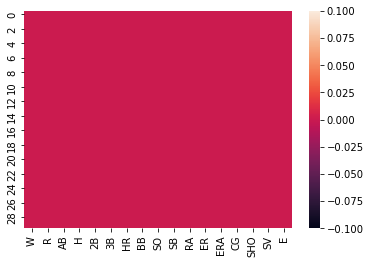

In [215]:
sns.heatmap(df.isnull())

The hitmap clearly shows that there is no any null value.

In [216]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


<AxesSubplot:>

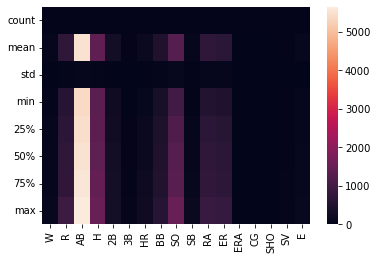

In [217]:
sns.heatmap(df.describe())

I can observe that all the columns have the count value of 30 there are no negative values and Few columns have very low values in it, where few have very low values in it, where few have very high values in the datset.
In above description some of column having outlier and skewness.we will observe the data using some other techniques.


# Data Visualization:


In [218]:
# First of all lets see the distribution 

# Univariate Analysis:

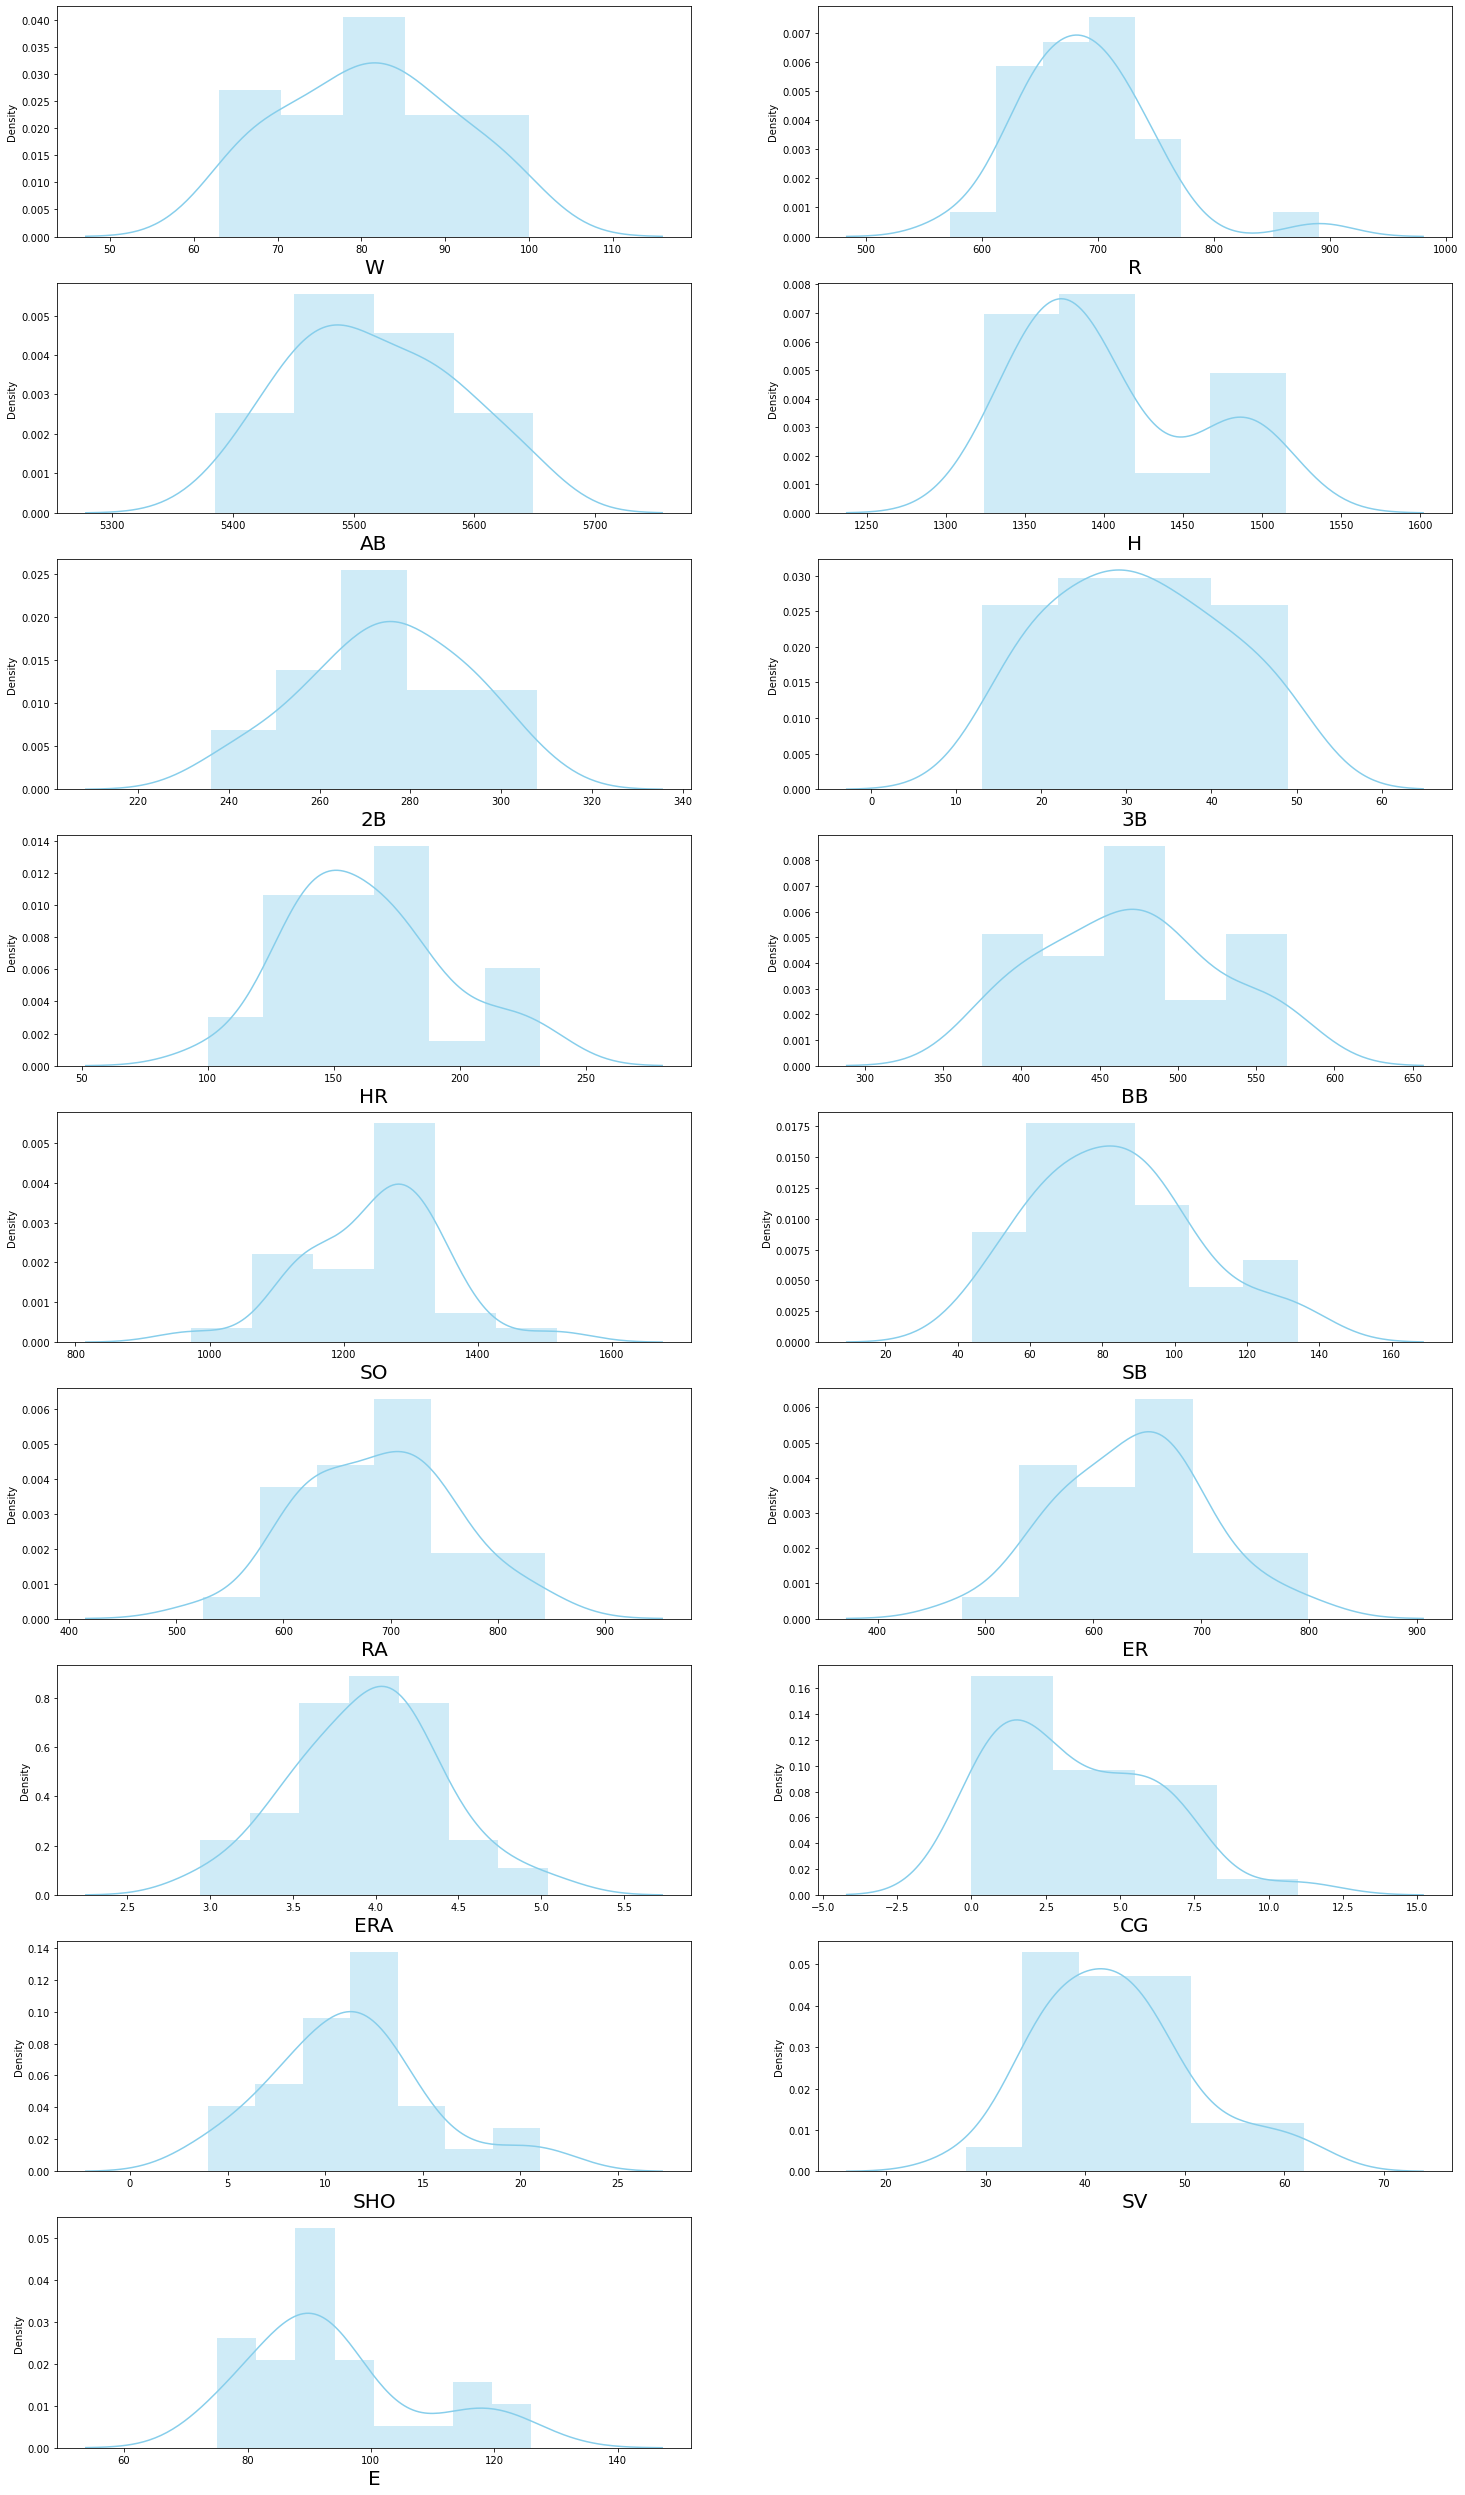

In [219]:
#Distribution of data
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

Almost all the columns are normally distributed.Except R,SO,CG and E.v

theory of all the columns:
    

# correlation

In [220]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

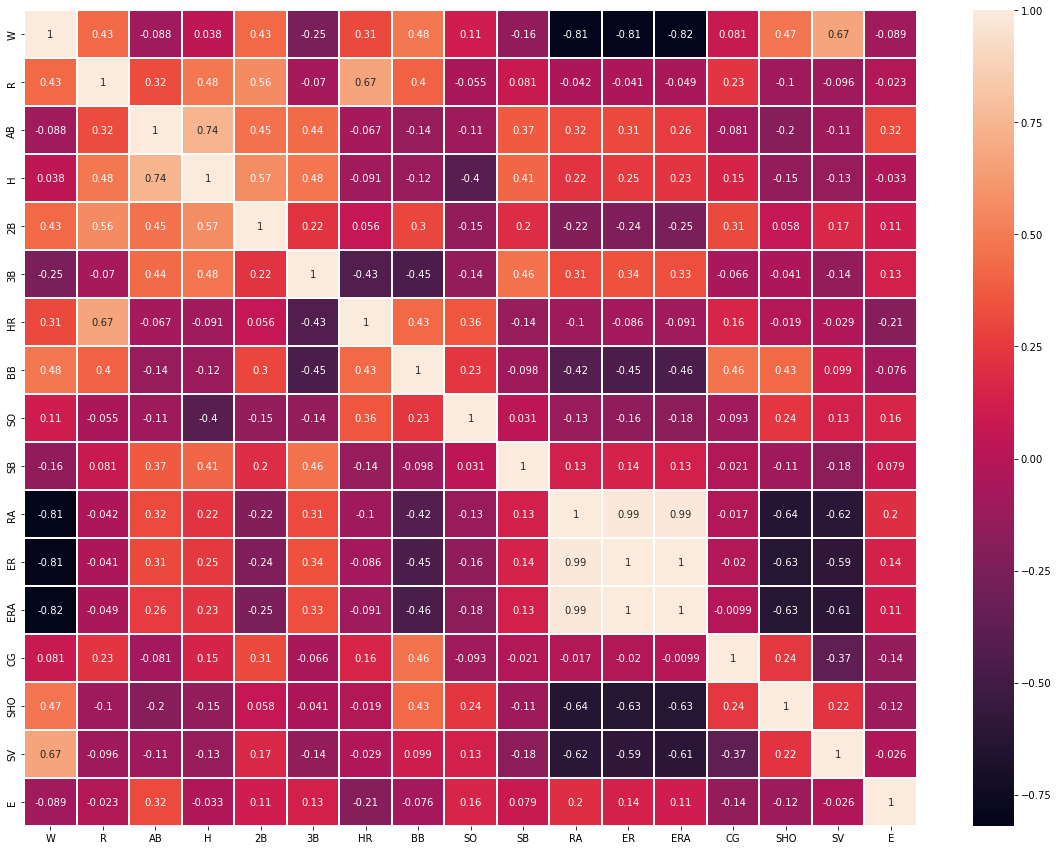

In [221]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

In [222]:
# Correlation analysis, First independent vs dependent

# R,HR,2B,BB,SHO, SV  is good correlated with target variable (W)

# AB, H, 3B, SO,SB,CG,E  are low correlated with target variable (+ and -)

# RA, ER, ERA  are highly negative correlated, we have to further check to drop any of them.

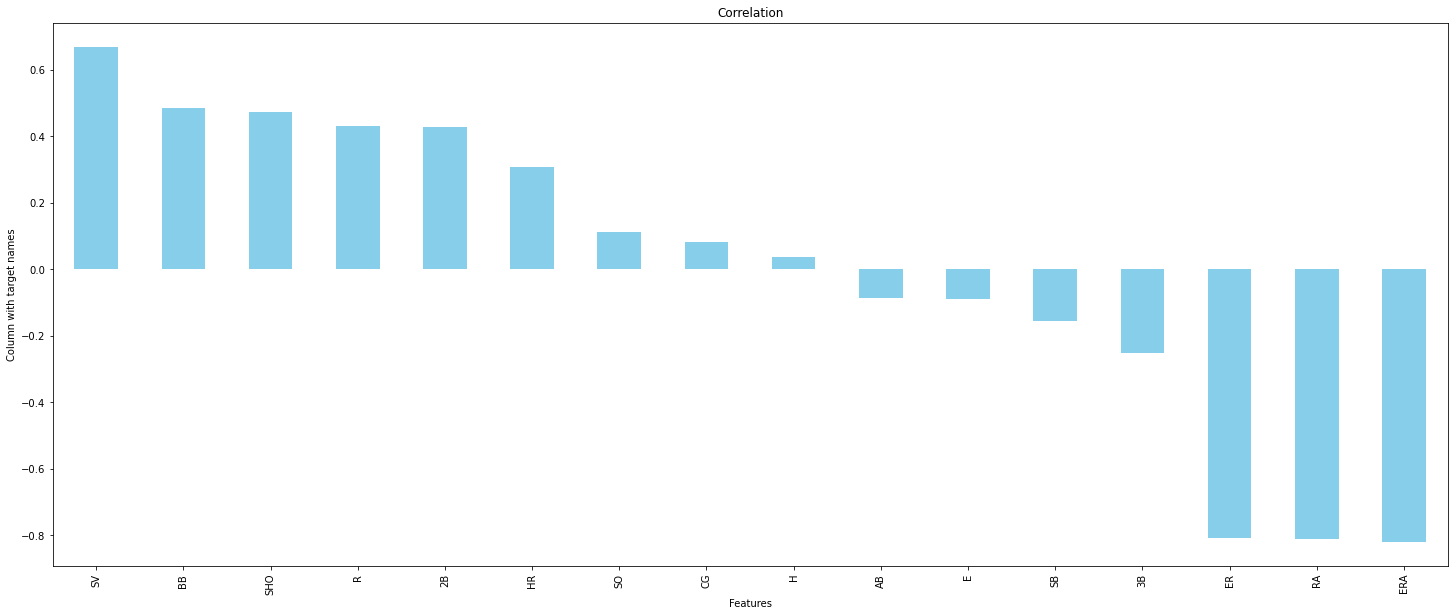

In [223]:
plt.figure(figsize =(25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

As we can see from the correlation matrix and the graph,ER,RA,ERA have the strongest correlation with wins but in negative nature.

In positive side SV has the highest correlation of 0.67 followed by BB,SHO,R,2B all above 0.4.

Even though ER,RA and ERA are very negatively correlated with wins but they showed highest correlation amongst themselves of over 0.99.

In [224]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:xlabel='R', ylabel='W'>

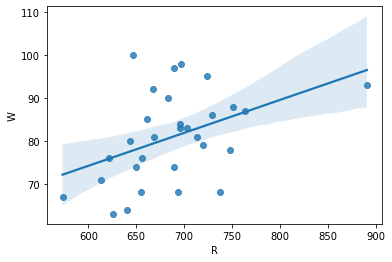

In [225]:
# Runs scored vs Win
sns.regplot('R','W',data=df)

In [226]:
# Run scored have positive graph with Winds,  more the run, more chances toi WIN

<AxesSubplot:xlabel='AB', ylabel='W'>

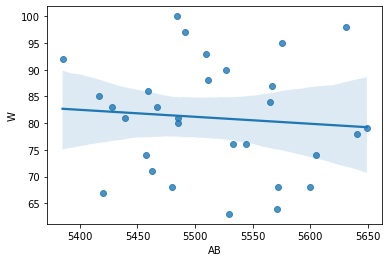

In [227]:
# AB vs Win
sns.regplot('AB','W',data=df)

<AxesSubplot:xlabel='H', ylabel='W'>

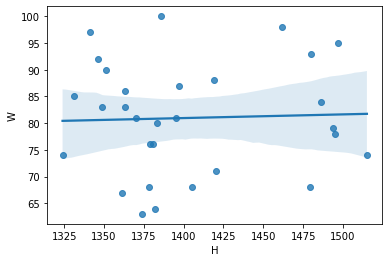

In [228]:
#  H vs win

sns.regplot('H','W',data=df)

In [229]:
# data distribution not in any directioon, low correlated with Win  .038, we can drop this feature, this is very low correelation. it will not help to 
# predict the win.

<AxesSubplot:xlabel='2B', ylabel='W'>

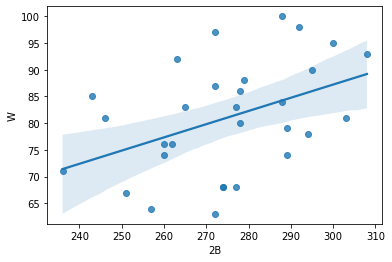

In [230]:
#  2B vs WIN

sns.regplot('2B','W',data=df)

In [231]:
# Positive correlated graph.  more 2B, more chances to win

<AxesSubplot:xlabel='3B', ylabel='W'>

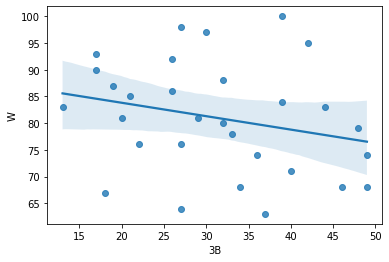

In [232]:
# 3B vs WIN

sns.regplot('3B','W',data=df)

In [233]:
# this distributin is low correlated, it wnt help to predict WIN more

<AxesSubplot:xlabel='HR', ylabel='W'>

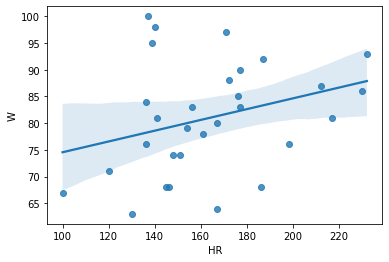

In [234]:
# HR vs WIN

sns.regplot('HR','W',data=df)

In [235]:
# Positive correlated

<AxesSubplot:xlabel='BB', ylabel='W'>

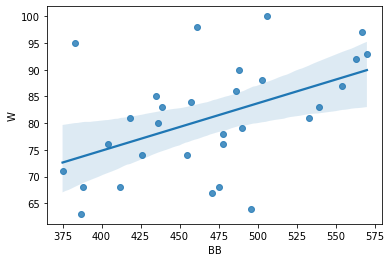

In [236]:
# BB vs win
sns.regplot('BB','W',data=df)

In [237]:
# positive correlated  Base on Ball

<AxesSubplot:xlabel='SO', ylabel='W'>

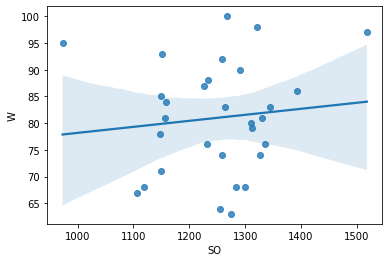

In [238]:
# SO vs WIN

sns.regplot('SO','W',data=df)

In [239]:
# low positive correlated

<AxesSubplot:xlabel='SB', ylabel='W'>

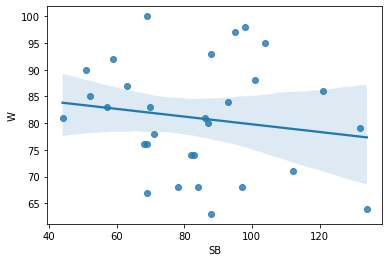

In [240]:
# SB vs win

sns.regplot('SB','W',data=df)

In [241]:
#  negative low correlated

<AxesSubplot:xlabel='RA', ylabel='W'>

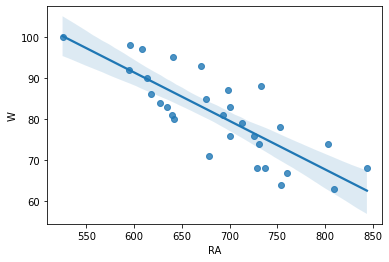

In [242]:
# RA vs win

sns.regplot('RA','W',data=df)

In [243]:
# Highly negative correlated

<AxesSubplot:xlabel='ER', ylabel='W'>

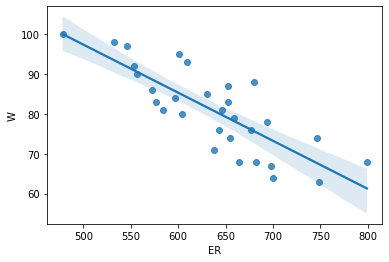

In [244]:
# ER vs Win

sns.regplot('ER','W',data=df)

In [245]:
#Highly negaticve correlated

<AxesSubplot:xlabel='ERA', ylabel='W'>

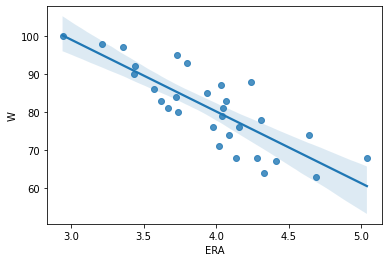

In [246]:
# ERA vs WIN

sns.regplot('ERA','W',data=df)

In [247]:
# highly negative correlated

<AxesSubplot:xlabel='CG', ylabel='W'>

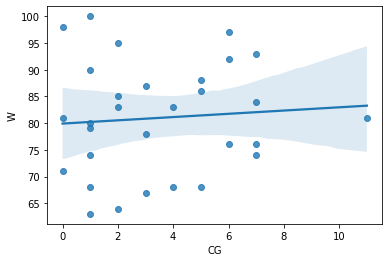

In [248]:
# CG vs WIN

sns.regplot('CG','W',data=df)

In [249]:
#  Very low correlated

<AxesSubplot:xlabel='SHO', ylabel='W'>

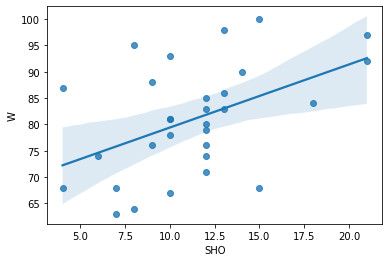

In [250]:
# SHO vs win

sns.regplot('SHO','W',data=df)

In [251]:
# positive correlated

<AxesSubplot:xlabel='SV', ylabel='W'>

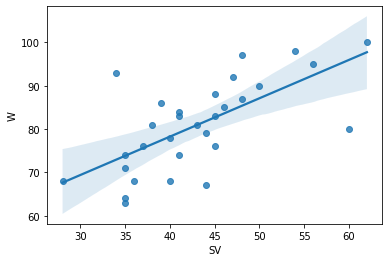

In [252]:
# SV vs win
sns.regplot('SV','W',data=df)

In [253]:
# positive correlated

<AxesSubplot:xlabel='E', ylabel='W'>

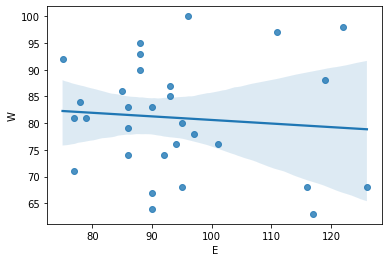

In [254]:
# E vs win

sns.regplot('E','W',data=df)


In [255]:
# very low correlated

# checking skewness

In [256]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Outliers

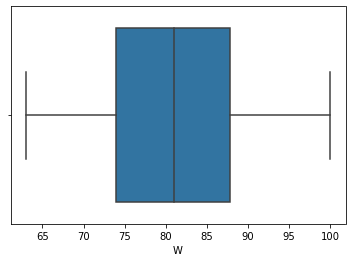

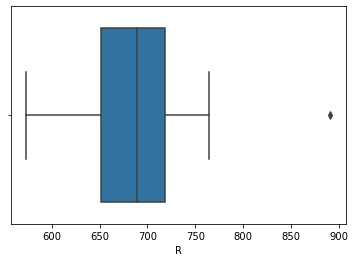

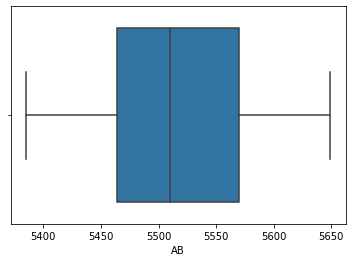

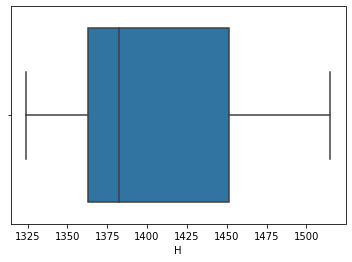

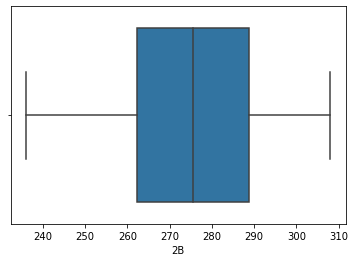

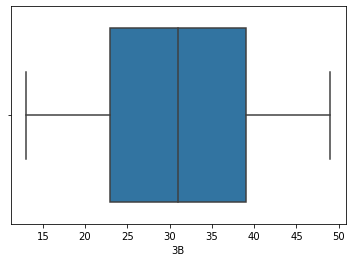

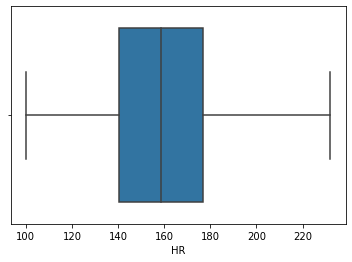

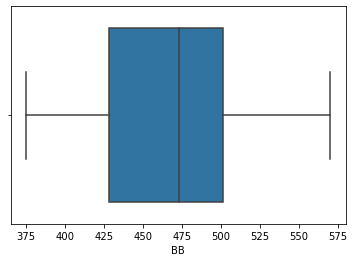

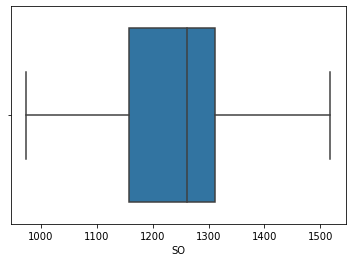

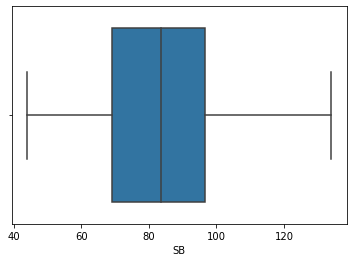

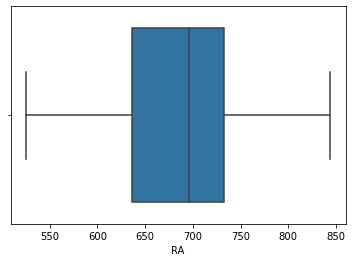

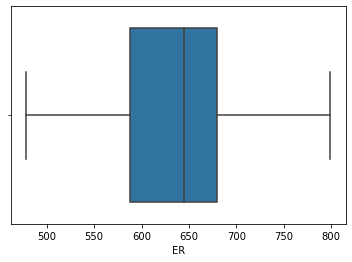

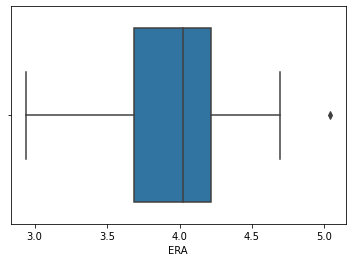

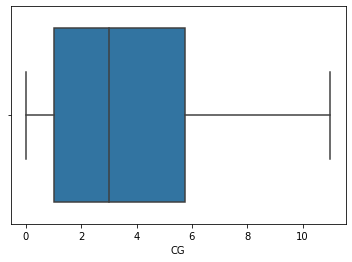

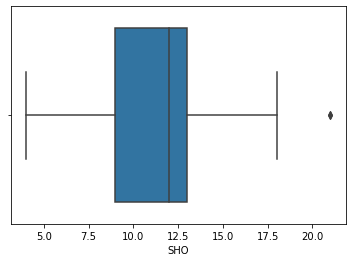

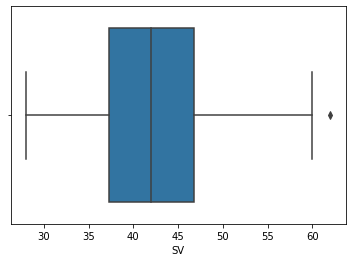

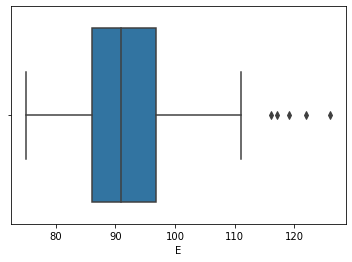

In [257]:
#using boxplots
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [258]:
#Outliers are in upper range of features R , ERA , SHO , SV , E

In [259]:
#Checking for Skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# VIF to find multicolinearity


In [261]:
v= df.drop('W', axis=1)
v.head(2)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


In [262]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(v)

In [263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [264]:
VIF= pd.DataFrame()
VIF['features']=v.columns

In [265]:
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]

In [266]:
VIF

,features,vif
0,R,11.522370
1,AB,13.311532
2,H,10.070668
3,2B,4.019297
4,3B,3.294146
5,HR,10.079902
6,BB,3.806098
7,SO,2.652401
8,SB,2.102684
9,RA,191.839155


In [267]:
# Many features have more than 5 VIF, 
# Delete feature 'ER'
v= df.drop(['W','ER'], axis=1)

In [269]:
v.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86


In [270]:
scaled=sc.fit_transform(v)

In [271]:
VIF2= pd.DataFrame()
VIF2['features']=v.columns

In [272]:
VIF2['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF2

,features,vif
0,R,11.158733
1,AB,5.863764
2,H,9.628749
3,2B,3.786446
4,3B,3.293109
5,HR,9.057309
6,BB,3.791451
7,SO,2.607389
8,SB,1.849280
9,RA,122.133235


In [273]:
v= df.drop(['W','ER','RA'], axis=1)


In [274]:
scaled=sc.fit_transform(v)

In [275]:
VIF3= pd.DataFrame()
VIF3['features']=v.columns

VIF3['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF3

,features,vif
0,R,10.987898
1,AB,4.399954
2,H,8.941874
3,2B,3.729413
4,3B,3.142717
5,HR,7.882841
6,BB,3.468244
7,SO,2.155496
8,SB,1.819823
9,ERA,4.951981


In [276]:
v.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [277]:
v.corr()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
R,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.126063,-0.020783,-0.106563,-0.183418,0.079149
ERA,-0.049281,0.255551,0.231172,-0.254854,0.330951,-0.090917,-0.459832,-0.180368,0.126063,1.000000,-0.009856,-0.630833,-0.607005,0.113137


In [278]:
#let check the corr() between these features fo more detail using heatmap


<AxesSubplot:>

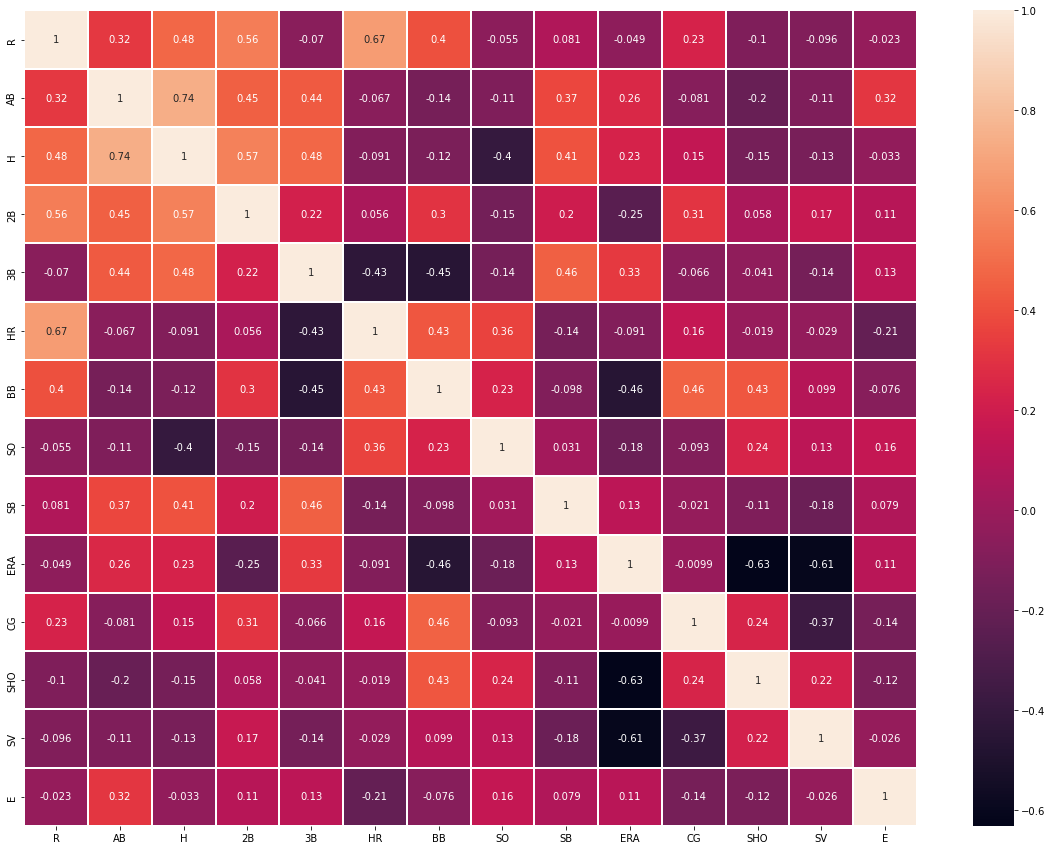

In [280]:
plt.figure(figsize=(20,15))
sns.heatmap(v.corr(),annot=True,linecolor='white',linewidths=.25)

# removing outliers

In [ ]:
#Outliers are in upper range of features R , ERA , SHO , SV , E 


In [281]:
IQR= df['R'].quantile(.75)-df['R'].quantile(.25)
IQR
upper= df['R'].quantile(.75) +( 1.5 * IQR)
upper

818.75

In [283]:
v['R']= np.where(v['R']>upper,upper,v['R'])

In [286]:
IQR= df['SHO'].quantile(.75)-df['SHO'].quantile(.25)
IQR
upper= df['SHO'].quantile(.75) +( 1.5 * IQR)
upper
v['SHO']= np.where(v['SHO']>upper,upper,v['SHO'])

In [287]:
IQR= df['SV'].quantile(.75)-df['SV'].quantile(.25)
IQR
upper= df['SV'].quantile(.75) +( 1.5 * IQR)
upper
v['SV']= np.where(v['SV']>upper,upper,v['SV'])

In [288]:
IQR= df['E'].quantile(.75)-df['E'].quantile(.25)
IQR
upper= df['E'].quantile(.75) +( 1.5 * IQR)
upper
v['E']= np.where(v['E']>upper,upper,v['E'])

In [289]:
IQR= df['ERA'].quantile(.75)-df['ERA'].quantile(.25)
IQR
upper= df['ERA'].quantile(.75) +( 1.5 * IQR)
upper
v['ERA']= np.where(v['ERA']>upper,upper,v['ERA'])

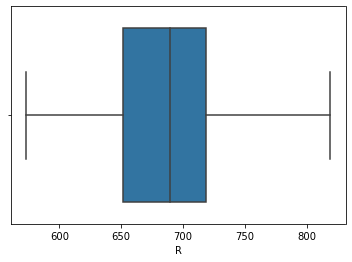

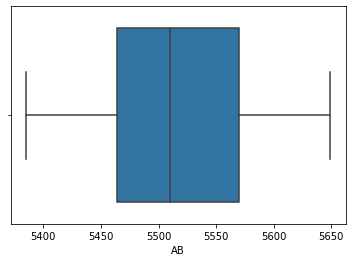

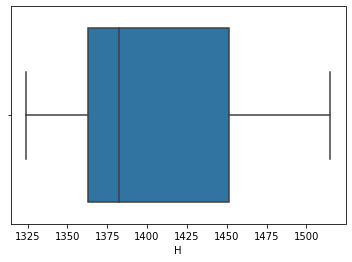

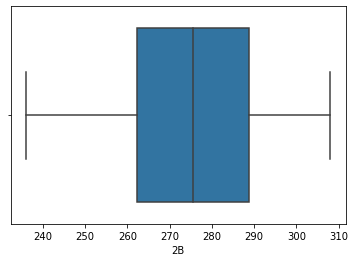

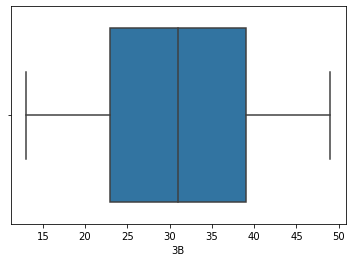

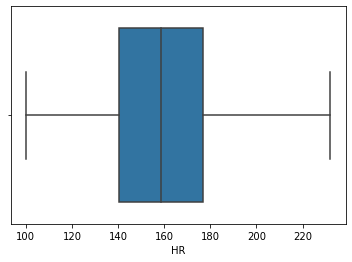

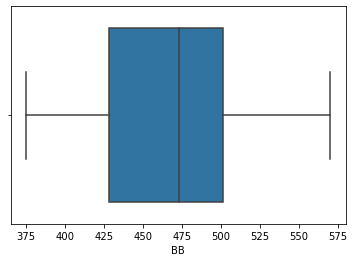

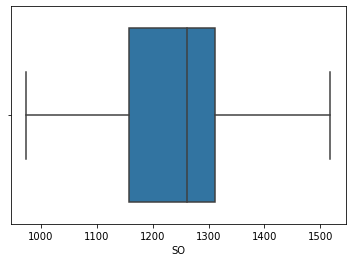

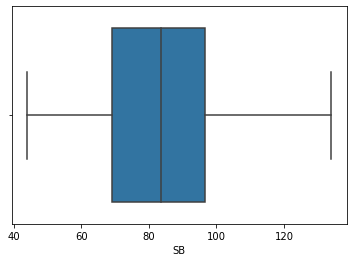

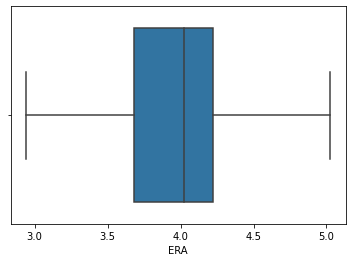

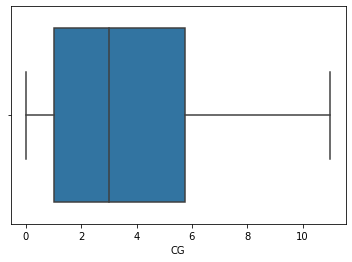

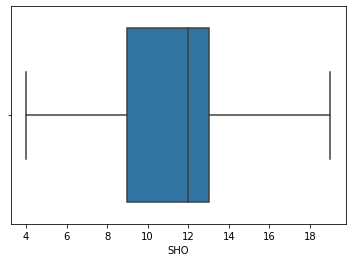

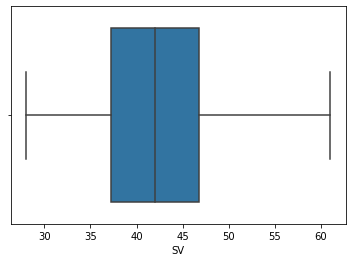

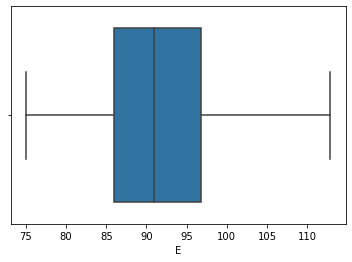

In [290]:
for i in v.columns:
    sns.boxplot(v[i])
    plt.show()

 outliers removed

In [291]:
# After handling outliers, skewness has been removed as well
v.skew()

R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.504019
dtype: float64

# Transformation

In [292]:
from sklearn.preprocessing import power_transform
transformed=power_transform(new_x)

In [293]:
transformed=pd.DataFrame(transformed)
transformed.columns=new_x.columns

In [294]:
transformed.skew()

R      0.005606
AB     0.006064
H      0.083872
2B    -0.018357
3B     0.014252
HR    -0.038631
BB     0.026217
SO     0.103754
SB     0.037142
CG     0.137257
SHO    0.015729
SV    -0.009829
E     -0.002562
dtype: float64

allmost all the skewness is removed

In [295]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(transformed)

# Seprating target and features


In [296]:
X= scaled

In [297]:
X.shape

(30, 13)

In [298]:
Y=df['W']

In [302]:
Y.shape

(30,)

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [305]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9716256098663311
At random state0, The test accuracy is :--0.07550837652899278


At random state1, The training accuracy is :-0.9741598999579113
At random state1, The test accuracy is :-0.6404595517712394


At random state2, The training accuracy is :-0.9891450568987425
At random state2, The test accuracy is :--0.5566563026144518


At random state3, The training accuracy is :-0.9699539368979305
At random state3, The test accuracy is :-0.6624623208353817


At random state4, The training accuracy is :-0.981766573284351
At random state4, The test accuracy is :-0.17798569806690734


At random state5, The training accuracy is :-0.946186758094796
At random state5, The test accuracy is :-0.9396859615690752


At random state6, The training accuracy is :-0.9564453635120529
At random state6, The test accuracy is :-0.8429965633958908


At random state7, The training accuracy is :-0.9700456707265642
At random state7, The test accuracy is :-0.312070267

At random state68, The training accuracy is :-0.9748209922553567
At random state68, The test accuracy is :-0.10485462438696758


At random state69, The training accuracy is :-0.9657694188487439
At random state69, The test accuracy is :-0.8397683490628864


At random state70, The training accuracy is :-0.9668482335325603
At random state70, The test accuracy is :--0.0286813350794759


At random state71, The training accuracy is :-0.9657131931329895
At random state71, The test accuracy is :-0.637852439266304


At random state72, The training accuracy is :-0.967643754324828
At random state72, The test accuracy is :-0.5846139200163096


At random state73, The training accuracy is :-0.9680238639144998
At random state73, The test accuracy is :-0.7584672453254209


At random state74, The training accuracy is :-0.9856599048266415
At random state74, The test accuracy is :--1.0957405387858885


At random state75, The training accuracy is :-0.9632871653591747
At random state75, The test accuracy i

In [306]:
#Splitting the data into 78% training and 22% testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=91)
                                              

In [307]:
x_train.shape

(23, 16)

In [308]:
y_train.shape

(23,)

In [309]:
x_test.shape

(7, 16)

In [310]:
y_test.shape

(7,)

# Model Building:


# Regression Algorithms:

In [311]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

# 1)Linear Regression:


In [312]:

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9663779277325483


In [313]:
print(',mean_squared_error:',mean_squared_error(LR_predict,y_test))
print('mean_absolute_error:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

,mean_squared_error: 70.75636684533353
mean_absolute_error: 6.971217319064968
r2_score: -7.881049090894209


# 2)Lasso Regressor:

In [314]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 10, 'random_state': 0}


In [315]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('.mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6910039200622298
mean_squared_error: 24.26565133878652
.mean_absolute_error: 4.184606651621729
mean_squared_error: 4.926017797246222


# 3)Ridge Regressor:

In [316]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [317]:
# rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8025946712873522
mse: 15.502361324209568
mae: 3.6306135520390024
rmse: 3.9373038140597645


# 4)SGD:

In [318]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -6.265141729180554e+28
mae: 4.920054157936075e+30
mae: 2207458468881900.2
rmse: 2218119509389896.5


# Cross Validation:


In [319]:
np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


In [323]:
models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),   
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

In [324]:
names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']


In [325]:
for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 46.989219, 50.031479
R   : 45.352935, 43.993734
svr   : 37.844466, 21.037026
svr_p   : 113.364760, 88.391782
svr_r   : 113.704943, 88.520076
RF   : 64.964740, 46.384391
DTR   : 101.300000, 68.004158
GBR   : 72.285344, 36.511005


# selecting LR s a final model

In [332]:
#Saving the model using .pkl
import joblib
joblib.dump(LR,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

MODELSAVED